In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib as plt
import seaborn as sns
from bs4 import BeautifulSoup

## Importing the raw dataset, inspecting it and cleaning it

In [2]:
forest = pd.read_excel(r'/Users/manele/Downloads/Forest_Fire_2022.xlsx')

In [3]:
forest

,ID,Type,Date,Department,Town,Area (ha),Cause
0,983,Forêt,2020-03-31,2B,Vallecalle,0.3000,-
1,1334,Forêt,2020-03-31,26,Curnier,1.0000,Accidentelle
2,5164,Forêt,2020-04-02,13,Fare-les-Oliviers (La),0.1000,Vehicules
3,1036,Forêt,2020-04-02,7,Malarce-sur-la-Thines,0.0002,-
4,5163,Forêt,2020-04-02,13,Saint-Cannat,0.1200,Travaux (Particuliers)
...,...,...,...,...,...,...,...
4278,6219,Forêt,2022-09-01,7,Beaulieu,8,Foudre
4279,6115,Forêt,2022-09-01,13,Fuveau,0.05,Malveillance
4280,6220,Forêt,2022-09-01,7,Montpezat-sous-Bauzon,0.02,Reprise Incendie
4281,5901,Forêt,2022-09-01,2B,Albertacce,1.2,Foudre


In [4]:
#EDA : Inspecting the data 

In [5]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4283 entries, 0 to 4282
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          4283 non-null   int64         
 1   Type        4283 non-null   object        
 2   Date        4283 non-null   datetime64[ns]
 3   Department  4283 non-null   object        
 4   Town        4283 non-null   object        
 5   Area (ha)   4283 non-null   object        
 6   Cause       4283 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 234.4+ KB


In [6]:
forest.describe()

,ID
count,4283.000000
mean,3856.944898
std,1855.578394
min,4.000000
25%,2456.500000
50%,3924.000000
75%,5409.500000
max,7605.000000


In [7]:
forest['Type'].unique()

array(['Forêt'], dtype=object)

In [8]:
forest['Department'].unique()

array(['2B', 26, 13, 7, 11, 48, 6, 34, '2A', 83, 66, 84, 5, 30, 4],
      dtype=object)

In [9]:
forest['Department'].value_counts()

13    919
11    565
2B    452
2A    394
34    342
66    267
30    238
7     214
83    190
6     189
4     164
48    123
84     99
5      79
26     48
Name: Department, dtype: int64

In [10]:
forest.isnull().sum()

ID            0
Type          0
Date          0
Department    0
Town          0
Area (ha)     0
Cause         0
dtype: int64

In [11]:
#I suspect that there is a lot of missing values in the 'Cause' column
#I inspect the number of missing values in the 'Cause' column knowing they are registered under '-'

In [12]:
forest.loc[forest['Cause'] == '-']

,ID,Type,Date,Department,Town,Area (ha),Cause
0,983,Forêt,2020-03-31,2B,Vallecalle,0.3000,-
3,1036,Forêt,2020-04-02,7,Malarce-sur-la-Thines,0.0002,-
5,1397,Forêt,2020-04-02,11,Armissan,0.0300,-
6,1052,Forêt,2020-04-03,48,Saint-Pierre-des-Tripiers,2.1700,-
7,1045,Forêt,2020-04-03,7,Meyras,2.0000,-
...,...,...,...,...,...,...,...
4274,6218,Forêt,2022-08-30,7,Saint-Julien-Labrousse,0.05,-
4275,6113,Forêt,2022-08-31,13,Martigues,0.002,-
4276,5827,Forêt,2022-08-31,34,Courniou,0.2118,-
4277,5858,Forêt,2022-08-31,13,Marseille,0.015,-


In [13]:
#I insepct the missing cause values per Department 

In [14]:
forest.loc[(forest['Department'] == 11)&(forest['Cause'] == '-')]

,ID,Type,Date,Department,Town,Area (ha),Cause
5,1397,Forêt,2020-04-02,11,Armissan,0.0300,-
30,1398,Forêt,2020-04-09,11,Lézignan-Corbières,0.0250,-
32,1399,Forêt,2020-04-09,11,Rieux-Minervois,1.1792,-
60,1400,Forêt,2020-04-16,11,Saint-Papoul,0.5000,-
70,2680,Forêt,2020-04-29,11,Névian,0.0900,-
...,...,...,...,...,...,...,...
4211,5693,Forêt,2022-08-15,11,Salsigne,0.07,-
4233,5695,Forêt,2022-08-18,11,Laure-Minervois,0.02,-
4239,5696,Forêt,2022-08-20,11,Fontiès-d'Aude,3.6779,-
4240,5697,Forêt,2022-08-21,11,Gruissan,11.3997,-


In [15]:
forest.loc[(forest['Department'] == 13)&(forest['Cause'] == '-')]

,ID,Type,Date,Department,Town,Area (ha),Cause
17,1286,Forêt,2020-04-06,13,Marseille,0.0500,-
21,4534,Forêt,2020-04-07,13,Miramas,0.2800,-
28,3555,Forêt,2020-04-09,13,Saint-Estève-Janson,0.3000,-
96,5171,Forêt,2020-06-02,13,Saint-Chamas,0.0200,-
132,5176,Forêt,2020-06-18,13,Saint-Chamas,0.0300,-
...,...,...,...,...,...,...,...
4251,6110,Forêt,2022-08-23,13,Venelles,0.001,-
4254,6112,Forêt,2022-08-24,13,Cabriès,0.0002,-
4275,6113,Forêt,2022-08-31,13,Martigues,0.002,-
4277,5858,Forêt,2022-08-31,13,Marseille,0.015,-


In [16]:
forest.loc[(forest['Department'] == 13)&(forest['Cause'])]

,ID,Type,Date,Department,Town,Area (ha),Cause
2,5164,Forêt,2020-04-02,13,Fare-les-Oliviers (La),0.1000,Vehicules
4,5163,Forêt,2020-04-02,13,Saint-Cannat,0.1200,Travaux (Particuliers)
17,1286,Forêt,2020-04-06,13,Marseille,0.0500,-
21,4534,Forêt,2020-04-07,13,Miramas,0.2800,-
28,3555,Forêt,2020-04-09,13,Saint-Estève-Janson,0.3000,-
...,...,...,...,...,...,...,...
4257,5964,Forêt,2022-08-25,13,Auriol,2.48,Travaux Industriels/Publics
4275,6113,Forêt,2022-08-31,13,Martigues,0.002,-
4277,5858,Forêt,2022-08-31,13,Marseille,0.015,-
4279,6115,Forêt,2022-09-01,13,Fuveau,0.05,Malveillance


In [17]:
forest['Cause'].unique()

array(['-', 'Accidentelle', 'Vehicules', 'Travaux (Particuliers)',
       'Malveillance', 'Travaux Agricoles', 'Travaux Industriels/Publics',
       "Depot d'Ordures", "Jet D'Objets Incandescents",
       'Reprise Incendie', 'Pyromanie', 'Travaux Forestiers',
       'Loisirs (Particuliers)', 'Conflit', 'Lignes Electriques',
       'Foudre', 'Chemin De Fer', 'Involontaire (particulier)', 'Intérêt',
       'Involontaire (travaux)', 'Autres', 'Autres Installations',
       'Autres imprudences'], dtype=object)

In [18]:
dept_13 = forest[(forest['Department']==13)]
dept_13['Town'].unique()

array(['Fare-les-Oliviers (La)', 'Saint-Cannat', 'Marseille', 'Miramas',
       'Saint-Estève-Janson', 'Tarascon', 'Martigues',
       'Saint-Martin-de-Crau', 'Éguilles', 'Lambesc', 'Saint-Chamas',
       'Port-de-Bouc', 'Salon-de-Provence', 'Pennes-Mirabeau (Les)',
       'Bouc-Bel-Air', 'Vitrolles', 'Charleval', 'Grans',
       'Puy-Sainte-Réparade (Le)', 'Mimet', 'Puyloubier',
       'Aix-en-Provence', 'Jouques', 'Cassis', 'Eyguières', 'Gémenos',
       'Rove (Le)', 'Fos-sur-Mer', 'Lançon-Provence', 'Gardanne',
       'Aubagne', 'Arles', 'Plan-de-Cuques', 'Bouilladisse (La)',
       "Plan-d'Orgon", 'Meyreuil', 'Cabriès', "Roque-d'Anthéron (La)",
       'Velaux', 'Auriol', 'Marignane', 'Vauvenargues',
       'Saint-Mitre-les-Remparts', 'Noves', 'Septèmes-les-Vallons',
       'Mouriès', 'Sausset-les-Pins', 'Trets', 'Saint-Paul-lès-Durance',
       'Simiane-Collongue', 'Istres', 'Venelles', 'Eygalières', 'Rognac',
       'Rousset', 'Saint-Victoret', 'Châteaurenard',
       'Saint-Rémy-

In [19]:
forest[(forest['Department']==13)&(forest['Town']=='Aix-en-Provence')]['Cause'].mode()

0    -
Name: Cause, dtype: object

In [20]:
forest[(forest['Department']==13)&(forest['Town']=='Fare-les-Oliviers (La)')]['Cause'].mode()

0    Vehicules
Name: Cause, dtype: object

In [21]:
forest[(forest['Department']==13)&(forest['Town']=='Fare-les-Oliviers (La)')]

,ID,Type,Date,Department,Town,Area (ha),Cause
2,5164,Forêt,2020-04-02,13,Fare-les-Oliviers (La),0.1000,Vehicules
979,5165,Forêt,2020-10-02,13,Fare-les-Oliviers (La),0.0100,-
2419,5620,Forêt,2021-08-28,13,Fare-les-Oliviers (La),0.04,Jet D'Objets Incandescents
3931,6237,Forêt,2022-07-25,13,Fare-les-Oliviers (La),0.4,Vehicules
3932,6236,Forêt,2022-07-25,13,Fare-les-Oliviers (La),0.3,Depot d'Ordures
3935,6239,Forêt,2022-07-26,13,Fare-les-Oliviers (La),0.2,Vehicules


In [22]:
#I intended to replace the cause with the mode cause of every departement but decided not too as the process might be too long and useless

In [23]:
forest.shape

(4283, 7)

In [24]:
forest[(forest['Department']==13)&(forest['Town']=='Saint-Cannat')]

,ID,Type,Date,Department,Town,Area (ha),Cause
4,5163,Forêt,2020-04-02,13,Saint-Cannat,0.1200,Travaux (Particuliers)
319,5223,Forêt,2020-07-13,13,Saint-Cannat,0.0050,Jet D'Objets Incandescents
1782,5647,Forêt,2021-06-28,13,Saint-Cannat,0.001,-


In [25]:
forest[(forest['Department']==13)&(forest['Town']=='Marseille')]

,ID,Type,Date,Department,Town,Area (ha),Cause
17,1286,Forêt,2020-04-06,13,Marseille,0.0500,-
332,2213,Forêt,2020-07-14,13,Marseille,0.0500,Accidentelle
796,4299,Forêt,2020-08-25,13,Marseille,1.0000,-
870,4556,Forêt,2020-09-04,13,Marseille,2.3900,-
1746,2731,Forêt,2021-06-19,13,Marseille,0.045,-
1761,2939,Forêt,2021-06-24,13,Marseille,1.7,Accidentelle
1784,3545,Forêt,2021-06-28,13,Marseille,0.5,Malveillance
1786,3544,Forêt,2021-06-28,13,Marseille,0.02,-
1890,4478,Forêt,2021-07-13,13,Marseille,6.4,-
1909,4479,Forêt,2021-07-14,13,Marseille,0.2,Malveillance


In [26]:
forest[(forest['Department']==13)&(forest['Town']=='Miramas')]

,ID,Type,Date,Department,Town,Area (ha),Cause
21,4534,Forêt,2020-04-07,13,Miramas,0.2800,-
212,2327,Forêt,2020-07-04,13,Miramas,0.2816,-
243,5210,Forêt,2020-07-06,13,Miramas,2.0000,-
259,5211,Forêt,2020-07-07,13,Miramas,0.1000,Vehicules
386,5245,Forêt,2020-07-18,13,Miramas,0.0050,-
824,5443,Forêt,2020-08-27,13,Miramas,0.0500,Malveillance
854,5436,Forêt,2020-08-31,13,Miramas,0.1000,Malveillance
855,5066,Forêt,2020-09-01,13,Miramas,0.0400,Malveillance
861,5069,Forêt,2020-09-03,13,Miramas,0.1500,Malveillance
1442,2645,Forêt,2021-04-06,13,Miramas,0.02,-


In [27]:
forest.shape

(4283, 7)

In [28]:
#After inspecting the dataset and trying to see if I can fill the missing values with means and mode 
#I realize that 1857 out of 4283 data is missing, I therefore create a new dataset where I drop the rows with those missing values
#The column cause is primordial for my analysis



In [29]:
forest_cause = forest[forest.Cause != '-']

In [30]:
forest_cause

,ID,Type,Date,Department,Town,Area (ha),Cause
1,1334,Forêt,2020-03-31,26,Curnier,1.0000,Accidentelle
2,5164,Forêt,2020-04-02,13,Fare-les-Oliviers (La),0.1000,Vehicules
4,5163,Forêt,2020-04-02,13,Saint-Cannat,0.1200,Travaux (Particuliers)
8,1335,Forêt,2020-04-03,26,Grignan,0.3000,Malveillance
10,1336,Forêt,2020-04-04,26,Vinsobres,1.5300,Travaux Agricoles
...,...,...,...,...,...,...,...
4273,5834,Forêt,2022-08-30,83,Bagnols-en-Forêt,0.02,Foudre
4278,6219,Forêt,2022-09-01,7,Beaulieu,8,Foudre
4279,6115,Forêt,2022-09-01,13,Fuveau,0.05,Malveillance
4280,6220,Forêt,2022-09-01,7,Montpezat-sous-Bauzon,0.02,Reprise Incendie


In [31]:
forest_cause['Cause'].unique()

array(['Accidentelle', 'Vehicules', 'Travaux (Particuliers)',
       'Malveillance', 'Travaux Agricoles', 'Travaux Industriels/Publics',
       "Depot d'Ordures", "Jet D'Objets Incandescents",
       'Reprise Incendie', 'Pyromanie', 'Travaux Forestiers',
       'Loisirs (Particuliers)', 'Conflit', 'Lignes Electriques',
       'Foudre', 'Chemin De Fer', 'Involontaire (particulier)', 'Intérêt',
       'Involontaire (travaux)', 'Autres', 'Autres Installations',
       'Autres imprudences'], dtype=object)

In [32]:
forest_cause['Department'].value_counts()

13    592
34    314
2A    250
66    207
2B    191
83    173
4     142
6     125
30    111
7     104
48     91
5      69
84     34
26     23
Name: Department, dtype: int64

In [33]:
forest_cause['Town'].value_counts()

Martigues                     55
Aix-en-Provence               34
Pennes-Mirabeau (Les)         23
Saint-Jean-de-la-Blaquière    23
Lançon-Provence               18
                              ..
Saint-Zacharie                 1
Issamoulenc                    1
Balaruc-le-Vieux               1
Saint-Cirgues-de-Prades        1
Beaulieu                       1
Name: Town, Length: 1041, dtype: int64

In [34]:
forest_cause.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426 entries, 1 to 4281
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          2426 non-null   int64         
 1   Type        2426 non-null   object        
 2   Date        2426 non-null   datetime64[ns]
 3   Department  2426 non-null   object        
 4   Town        2426 non-null   object        
 5   Area (ha)   2426 non-null   object        
 6   Cause       2426 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 151.6+ KB


In [35]:
forest_cause

,ID,Type,Date,Department,Town,Area (ha),Cause
1,1334,Forêt,2020-03-31,26,Curnier,1.0000,Accidentelle
2,5164,Forêt,2020-04-02,13,Fare-les-Oliviers (La),0.1000,Vehicules
4,5163,Forêt,2020-04-02,13,Saint-Cannat,0.1200,Travaux (Particuliers)
8,1335,Forêt,2020-04-03,26,Grignan,0.3000,Malveillance
10,1336,Forêt,2020-04-04,26,Vinsobres,1.5300,Travaux Agricoles
...,...,...,...,...,...,...,...
4273,5834,Forêt,2022-08-30,83,Bagnols-en-Forêt,0.02,Foudre
4278,6219,Forêt,2022-09-01,7,Beaulieu,8,Foudre
4279,6115,Forêt,2022-09-01,13,Fuveau,0.05,Malveillance
4280,6220,Forêt,2022-09-01,7,Montpezat-sous-Bauzon,0.02,Reprise Incendie


In [36]:
#Inspecting the Burnt Area column I realize that there are some weird values

In [37]:
forest_cause['Area (ha)'].unique()

array(['1.0000', '0.1000', '0.1200', '0.3000', '1.5300', '1.1000',
       '0.2736', '0.0100', '0.0500', '0.6000', '0.5000', '0.7092',
       '1.2673', '0.2000', '0.7900', '0.8600', '0.0080', '0.3400',
       '9.3400', '0.3500', '0.0020', '0.4000', '0.0030', '0.1500',
       '0.0400', '0.0002', '0.0001', '0.1850', '1.2191', '0.0160',
       '0.0200', '0.0060', '0.0012', '0.0010', '89.8200', '0.0142',
       '0.7000', '1.3740', '0.2500', '0.0475', '0.0210', '0.2600',
       '0.0300', '0.0050', '0.2008', '0.0463', '0.0236', '0.0005',
       '0.0215', '0.0040', '0.0150', '6.2000', '1.0400', '0.7478',
       '0.0600', '2.3931', '1.3000', '0.0099', '10.0000', '8.6050',
       '1.5462', '0.6316', '0.0069', '1.6600', '1.4300', '0.8000',
       '4.0000', '0.1980', '0.0490', '8.0000', '13.5801', '0.0250',
       '0.2200', '51.7100', '1.3265', '0.0004', '0.0117', '1.4097',
       '28.6300', '0.0038', '0.0968', '0.1559', '0.0726', '2.1346',
       '0.1836', '32.2600', '0.7934', '0.0522', '0.0146',

In [38]:
forest_cause['Town'].unique

<bound method Series.unique of 1                      Curnier
2       Fare-les-Oliviers (La)
4                 Saint-Cannat
8                      Grignan
10                   Vinsobres
                 ...          
4273          Bagnols-en-Forêt
4278                  Beaulieu
4279                    Fuveau
4280     Montpezat-sous-Bauzon
4281                Albertacce
Name: Town, Length: 2426, dtype: object>

In [39]:
forest_cause.loc[forest_cause['Area (ha)'] == '2\xa0500,0000']

,ID,Type,Date,Department,Town,Area (ha),Cause
3568,5278,Forêt,2022-06-18,83,Aiguines,"2 500,0000",Travaux Industriels/Publics


In [40]:
forest_cause.loc[forest_cause['Area (ha)'] == '1\xa0451,5300']

,ID,Type,Date,Department,Town,Area (ha),Cause
3804,5954,Forêt,2022-07-14,13,Graveson,"1 451,5300",Chemin De Fer


In [41]:
forest_cause.loc[forest_cause['Area (ha)'] == '1.0000']

,ID,Type,Date,Department,Town,Area (ha),Cause
1,1334,Forêt,2020-03-31,26,Curnier,1.0000,Accidentelle
16,1053,Forêt,2020-04-06,48,Saint-Pierre-des-Tripiers,1.0000,Reprise Incendie
27,1207,Forêt,2020-04-09,7,Lanarce,1.0000,Travaux Agricoles
113,4465,Forêt,2020-06-12,66,Rivesaltes,1.0000,Chemin De Fer
204,1933,Forêt,2020-07-03,7,Laurac-en-Vivarais,1.0000,Foudre
214,5636,Forêt,2020-07-04,66,Claira,1.0000,Malveillance
396,5650,Forêt,2020-07-19,66,Cases-de-Pène,1.0000,Malveillance
477,5655,Forêt,2020-07-29,66,Boulou (Le),1.0000,Travaux Industriels/Publics
490,5656,Forêt,2020-07-30,66,Opoul-Périllos,1.0000,Travaux Industriels/Publics
500,3382,Forêt,2020-08-01,83,Toulon,1.0000,Loisirs (Particuliers)


In [42]:
forest_cause = forest_cause.replace(',','.')
forest_cause.loc[forest_cause['Area (ha)'] == '1\xa0451,5300']

,ID,Type,Date,Department,Town,Area (ha),Cause
3804,5954,Forêt,2022-07-14,13,Graveson,"1 451,5300",Chemin De Fer


In [43]:
#I use a lambda function to normalize the numbers

In [49]:
forest_cause['Area (ha)'] = forest_cause['Area (ha)'].apply(lambda x: str(x).replace(u'\xa0', u''))



In [50]:
forest_cause['Area (ha)'] = forest_cause['Area (ha)'].apply(lambda x: str(x).replace(u',', u'.'))

In [51]:
#I can now convert the data to numeric values

In [52]:
forest_cause['Area (ha)'] = pd.to_numeric(forest_cause['Area (ha)'])

In [53]:
forest_cause['Area (ha)'].unique()

array([1.000000e+00, 1.000000e-01, 1.200000e-01, 3.000000e-01,
       1.530000e+00, 1.100000e+00, 2.736000e-01, 1.000000e-02,
       5.000000e-02, 6.000000e-01, 5.000000e-01, 7.092000e-01,
       1.267300e+00, 2.000000e-01, 7.900000e-01, 8.600000e-01,
       8.000000e-03, 3.400000e-01, 9.340000e+00, 3.500000e-01,
       2.000000e-03, 4.000000e-01, 3.000000e-03, 1.500000e-01,
       4.000000e-02, 2.000000e-04, 1.000000e-04, 1.850000e-01,
       1.219100e+00, 1.600000e-02, 2.000000e-02, 6.000000e-03,
       1.200000e-03, 1.000000e-03, 8.982000e+01, 1.420000e-02,
       7.000000e-01, 1.374000e+00, 2.500000e-01, 4.750000e-02,
       2.100000e-02, 2.600000e-01, 3.000000e-02, 5.000000e-03,
       2.008000e-01, 4.630000e-02, 2.360000e-02, 5.000000e-04,
       2.150000e-02, 4.000000e-03, 1.500000e-02, 6.200000e+00,
       1.040000e+00, 7.478000e-01, 6.000000e-02, 2.393100e+00,
       1.300000e+00, 9.900000e-03, 1.000000e+01, 8.605000e+00,
       1.546200e+00, 6.316000e-01, 6.900000e-03, 1.6600

In [54]:
Area = forest_cause['Area (ha)']

In [55]:
#Now that the Burnt Area column is cleaned and converted to numeric values I do a boxplot to inspect it

<AxesSubplot:xlabel='Area (ha)'>

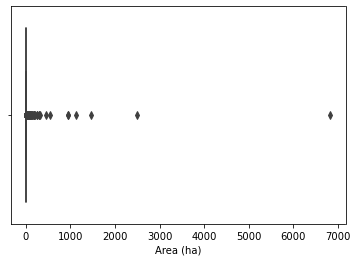

In [56]:
sns.boxplot(x = Area)

In [57]:
#I find an outlier, I need to inspect it to determine if it is useful to get rid of it.

In [58]:
Area.max()

6832.0

In [59]:
forest_cause.loc[forest_cause['Area (ha)'] == 6832.0]

,ID,Type,Date,Department,Town,Area (ha),Cause
2256,5950,Forêt,2021-08-16,83,Gonfaron,6832.0,Jet D'Objets Incandescents


In [60]:
#From purely statistical perspective it is an outlier, but from my topic's pov it is necessary for my analysis, 
#I decide to keep it

In [61]:
forest_cause.loc[forest_cause['Town'] == 'Aiguines']

,ID,Type,Date,Department,Town,Area (ha),Cause
629,3504,Forêt,2020-08-09,83,Aiguines,0.055,Malveillance
830,4836,Forêt,2020-08-28,83,Aiguines,165.740,Foudre
3568,5278,Forêt,2022-06-18,83,Aiguines,2500.000,Travaux Industriels/Publics


In [62]:
forest_cause['Area (ha)'].dtype

dtype('float64')

In [63]:
forest_cause.dtypes

ID                     int64
Type                  object
Date          datetime64[ns]
Department            object
Town                  object
Area (ha)            float64
Cause                 object
dtype: object

In [64]:
forest_cause['Type'].unique()

array(['Forêt'], dtype=object)

In [65]:
forest_cause['Cause'].unique()

array(['Accidentelle', 'Vehicules', 'Travaux (Particuliers)',
       'Malveillance', 'Travaux Agricoles', 'Travaux Industriels/Publics',
       "Depot d'Ordures", "Jet D'Objets Incandescents",
       'Reprise Incendie', 'Pyromanie', 'Travaux Forestiers',
       'Loisirs (Particuliers)', 'Conflit', 'Lignes Electriques',
       'Foudre', 'Chemin De Fer', 'Involontaire (particulier)', 'Intérêt',
       'Involontaire (travaux)', 'Autres', 'Autres Installations',
       'Autres imprudences'], dtype=object)

In [66]:
forest_cause['Department'].unique()

array([26, 13, 34, '2A', 7, 48, 83, 66, 84, '2B', 5, 6, 4, 30],
      dtype=object)

In [67]:
#I now prepare my date to exported to SQL

In [68]:
forest_cause['Town'] = forest_cause['Town'].apply(str.upper)

In [69]:
forest_cause

,ID,Type,Date,Department,Town,Area (ha),Cause
1,1334,Forêt,2020-03-31,26,CURNIER,1.00,Accidentelle
2,5164,Forêt,2020-04-02,13,FARE-LES-OLIVIERS (LA),0.10,Vehicules
4,5163,Forêt,2020-04-02,13,SAINT-CANNAT,0.12,Travaux (Particuliers)
8,1335,Forêt,2020-04-03,26,GRIGNAN,0.30,Malveillance
10,1336,Forêt,2020-04-04,26,VINSOBRES,1.53,Travaux Agricoles
...,...,...,...,...,...,...,...
4273,5834,Forêt,2022-08-30,83,BAGNOLS-EN-FORÊT,0.02,Foudre
4278,6219,Forêt,2022-09-01,7,BEAULIEU,8.00,Foudre
4279,6115,Forêt,2022-09-01,13,FUVEAU,0.05,Malveillance
4280,6220,Forêt,2022-09-01,7,MONTPEZAT-SOUS-BAUZON,0.02,Reprise Incendie


In [70]:
forest_cause.rename(columns = {'Department':'Code_Departement', 'Town':'Commune'}, inplace = True)



In [71]:
forest_cause

,ID,Type,Date,Code_Departement,Commune,Area (ha),Cause
1,1334,Forêt,2020-03-31,26,CURNIER,1.00,Accidentelle
2,5164,Forêt,2020-04-02,13,FARE-LES-OLIVIERS (LA),0.10,Vehicules
4,5163,Forêt,2020-04-02,13,SAINT-CANNAT,0.12,Travaux (Particuliers)
8,1335,Forêt,2020-04-03,26,GRIGNAN,0.30,Malveillance
10,1336,Forêt,2020-04-04,26,VINSOBRES,1.53,Travaux Agricoles
...,...,...,...,...,...,...,...
4273,5834,Forêt,2022-08-30,83,BAGNOLS-EN-FORÊT,0.02,Foudre
4278,6219,Forêt,2022-09-01,7,BEAULIEU,8.00,Foudre
4279,6115,Forêt,2022-09-01,13,FUVEAU,0.05,Malveillance
4280,6220,Forêt,2022-09-01,7,MONTPEZAT-SOUS-BAUZON,0.02,Reprise Incendie


In [72]:
#I can now export my data to csv, it is now ready to be exported to SQL :

In [73]:
forest_cause.to_csv(r'/Users/manele/Downloads/DF_Forest_Fire.csv', index = False)



In [74]:
# Exporting it, I realize that french accents are not compatible with csv in SQL, I change all the accents :

In [75]:
forest_cause['Type'] = forest_cause['Type'].str.replace(u"ê", "e")

In [76]:
forest_cause['Commune'].unique

<bound method Series.unique of 1                      CURNIER
2       FARE-LES-OLIVIERS (LA)
4                 SAINT-CANNAT
8                      GRIGNAN
10                   VINSOBRES
                 ...          
4273          BAGNOLS-EN-FORÊT
4278                  BEAULIEU
4279                    FUVEAU
4280     MONTPEZAT-SOUS-BAUZON
4281                ALBERTACCE
Name: Commune, Length: 2426, dtype: object>

In [77]:
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"Ê", "E")
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"É", "E")
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"È", "E")
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"Â", "A")
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"À", "A")
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"Ç", "C")
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"Î", "I")
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"Ï", "I")
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"Û", "U")
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"Ü", "U")
forest_cause['Commune'] = forest_cause['Commune'].str.replace(u"Ô", "O")

forest_cause['Cause'] = forest_cause['Cause'].str.replace(u"é", "e")
forest_cause['Cause'] = forest_cause['Cause'].str.replace(u"è", "e")
forest_cause['Cause'] = forest_cause['Cause'].str.replace(u"ê", "e")

In [78]:
forest_cause.to_csv(r'/Users/manele/Downloads/DF_Forest_Fire2.csv', index = False)

In [79]:
#Data set cleaned and ready for SQL 
#Let's do some data exploration on it :

## Exploratory Data Analysis

In [80]:
forest_cause

,ID,Type,Date,Code_Departement,Commune,Area (ha),Cause
1,1334,Foret,2020-03-31,26,CURNIER,1.00,Accidentelle
2,5164,Foret,2020-04-02,13,FARE-LES-OLIVIERS (LA),0.10,Vehicules
4,5163,Foret,2020-04-02,13,SAINT-CANNAT,0.12,Travaux (Particuliers)
8,1335,Foret,2020-04-03,26,GRIGNAN,0.30,Malveillance
10,1336,Foret,2020-04-04,26,VINSOBRES,1.53,Travaux Agricoles
...,...,...,...,...,...,...,...
4273,5834,Foret,2022-08-30,83,BAGNOLS-EN-FORET,0.02,Foudre
4278,6219,Foret,2022-09-01,7,BEAULIEU,8.00,Foudre
4279,6115,Foret,2022-09-01,13,FUVEAU,0.05,Malveillance
4280,6220,Foret,2022-09-01,7,MONTPEZAT-SOUS-BAUZON,0.02,Reprise Incendie


### Hectares lost in forest fires bbetween Sept 2021 and Sept 2022

In [81]:
#Total hectares lost in forest fires between Sept 2021 and Sept 2022 in the area

In [82]:
forest_2022 = forest_cause.loc[(forest_cause['Date'] >= '2021-09-01') & (forest_cause['Date'] < '2022-09-01')]
forest_2022['Area (ha)'].sum()

12208.140800000001

In [83]:
forest_2022['Area (ha)'].mean()

11.910381268292687

In [84]:
#Total hectares lost in forest fires betwee Sept 2020 and Sept 2021 in the area
forest_2021 = forest_cause.loc[(forest_cause['Date'] >= '2020-09-01') & (forest_cause['Date'] < '2021-09-01')]
forest_2021['Area (ha)'].sum()

8957.1668

In [85]:
forest_2021['Area (ha)'].mean()

10.367091203703698

In [86]:
sum_burnt_2022 = forest_2022['Area (ha)'].sum()
sum_burnt_2021 = forest_2021['Area (ha)'].sum()
sum_burnt = pd.DataFrame({'Burnt Area 2021': sum_burnt_2021, 'Burnt Area 2022': sum_burnt_2022}, index=[0])

<AxesSubplot:>

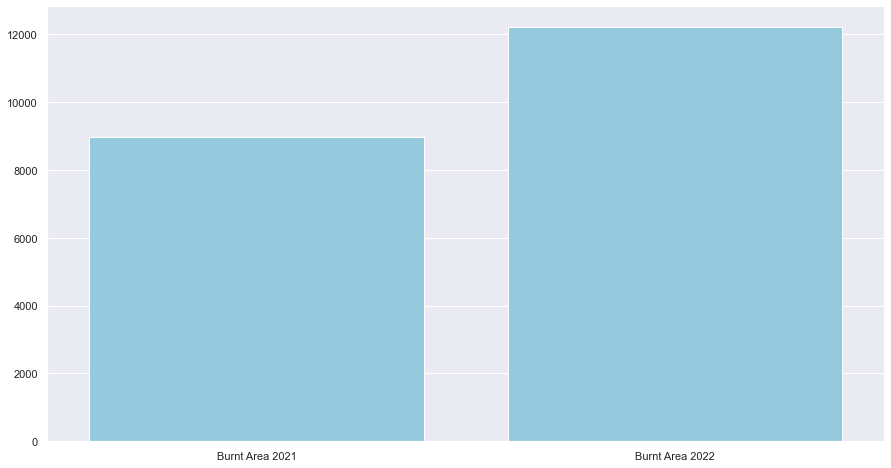

In [87]:
sns.set(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=sum_burnt, color="skyblue")


In [88]:
forest_cause.shape

(2426, 7)

In [89]:
forest_cause

,ID,Type,Date,Code_Departement,Commune,Area (ha),Cause
1,1334,Foret,2020-03-31,26,CURNIER,1.00,Accidentelle
2,5164,Foret,2020-04-02,13,FARE-LES-OLIVIERS (LA),0.10,Vehicules
4,5163,Foret,2020-04-02,13,SAINT-CANNAT,0.12,Travaux (Particuliers)
8,1335,Foret,2020-04-03,26,GRIGNAN,0.30,Malveillance
10,1336,Foret,2020-04-04,26,VINSOBRES,1.53,Travaux Agricoles
...,...,...,...,...,...,...,...
4273,5834,Foret,2022-08-30,83,BAGNOLS-EN-FORET,0.02,Foudre
4278,6219,Foret,2022-09-01,7,BEAULIEU,8.00,Foudre
4279,6115,Foret,2022-09-01,13,FUVEAU,0.05,Malveillance
4280,6220,Foret,2022-09-01,7,MONTPEZAT-SOUS-BAUZON,0.02,Reprise Incendie


In [90]:
forest['Cause'].value_counts()

-                              1857
Malveillance                    643
Travaux (Particuliers)          330
Jet D'Objets Incandescents      279
Foudre                          218
Travaux Agricoles               154
Vehicules                       123
Loisirs (Particuliers)          107
Lignes Electriques              104
Travaux Forestiers               77
Travaux Industriels/Publics      71
Reprise Incendie                 53
Intérêt                          53
Depot d'Ordures                  48
Accidentelle                     47
Conflit                          41
Involontaire (particulier)       28
Pyromanie                        24
Chemin De Fer                    11
Involontaire (travaux)           10
Autres Installations              3
Autres                            1
Autres imprudences                1
Name: Cause, dtype: int64

In [100]:
forest_cause.loc[forest_cause['Code_Departement'] == 84, ['Area (ha)']]

,Area (ha)
47,0.8600
125,0.2600
245,0.0490
422,0.0700
513,0.5100
514,0.3200
561,0.4000
587,0.0200
589,0.0900
657,0.0112


### Most frequent causes of fire

<AxesSubplot:>

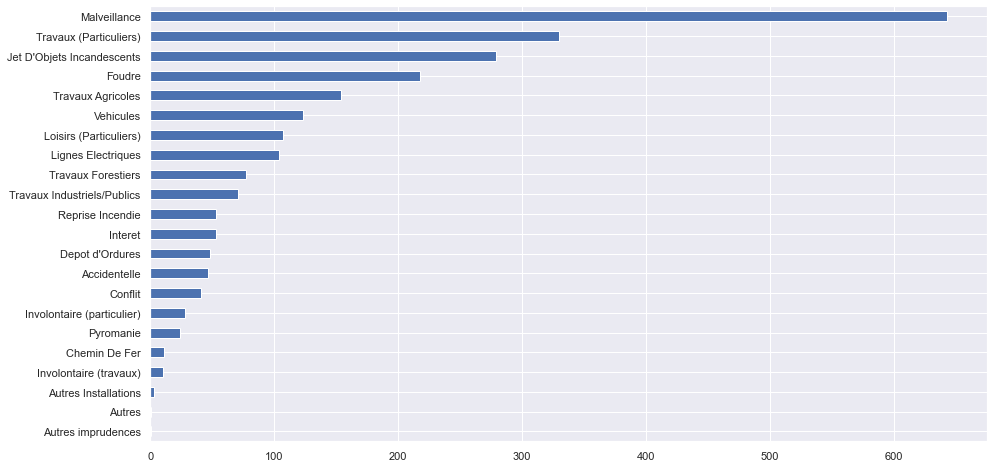

In [91]:
forest_cause.Cause.value_counts().sort_values().plot(kind = 'barh')

In [82]:
forest_cause.columns

Index(['ID', 'Type', 'Date', 'Code_Departement', 'Commune', 'Area (ha)',
       'Cause'],
      dtype='object')

### Pivot table that shows amount of burnt era by departement and cause 

In [83]:
a = forest_cause['Code_Departement'].unique
b = forest_cause['Area (ha)'].count()
c = forest_cause['Cause'].unique

In [84]:
pd.pivot_table(forest_cause, values='Area (ha)', index='Code_Departement', 
               columns='Cause', aggfunc='count', margins = True)



Cause,Accidentelle,Autres,Autres Installations,Autres imprudences,Chemin De Fer,Conflit,Depot d'Ordures,Foudre,Interet,Involontaire (particulier),...,Loisirs (Particuliers),Malveillance,Pyromanie,Reprise Incendie,Travaux (Particuliers),Travaux Agricoles,Travaux Forestiers,Travaux Industriels/Publics,Vehicules,All
Code_Departement,,,,,,,,,,,,,,,,,,,,,
4,1.0,NaN,NaN,NaN,NaN,NaN,1.0,29.0,NaN,2.0,...,9.0,9.0,4.0,3.0,16.0,10.0,8.0,8.0,7.0,142
5,1.0,NaN,NaN,NaN,NaN,NaN,1.0,12.0,1.0,1.0,...,5.0,11.0,6.0,1.0,7.0,8.0,3.0,NaN,3.0,69
6,1.0,NaN,1.0,NaN,NaN,1.0,NaN,37.0,19.0,1.0,...,9.0,6.0,NaN,NaN,26.0,1.0,6.0,2.0,7.0,125
7,NaN,NaN,NaN,1.0,3.0,NaN,NaN,11.0,NaN,NaN,...,2.0,11.0,2.0,1.0,27.0,24.0,NaN,NaN,5.0,104
13,2.0,NaN,NaN,NaN,5.0,1.0,23.0,12.0,1.0,NaN,...,28.0,124.0,1.0,4.0,95.0,27.0,3.0,21.0,54.0,592
26,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,...,2.0,7.0,1.0,NaN,2.0,3.0,1.0,NaN,NaN,23
30,9.0,NaN,NaN,NaN,NaN,1.0,NaN,5.0,NaN,2.0,...,5.0,47.0,1.0,14.0,7.0,4.0,2.0,NaN,4.0,111
34,23.0,NaN,1.0,NaN,NaN,19.0,3.0,8.0,7.0,10.0,...,12.0,137.0,4.0,9.0,9.0,18.0,13.0,3.0,12.0,314
48,1.0,1.0,NaN,NaN,NaN,NaN,1.0,12.0,NaN,NaN,...,3.0,3.0,2.0,1.0,18.0,20.0,7.0,12.0,NaN,91


In [85]:
forest_pivot = pd.pivot_table(forest_cause, values='Area (ha)', index='Code_Departement', columns='Cause', aggfunc='count')


<AxesSubplot:xlabel='Code_Departement'>

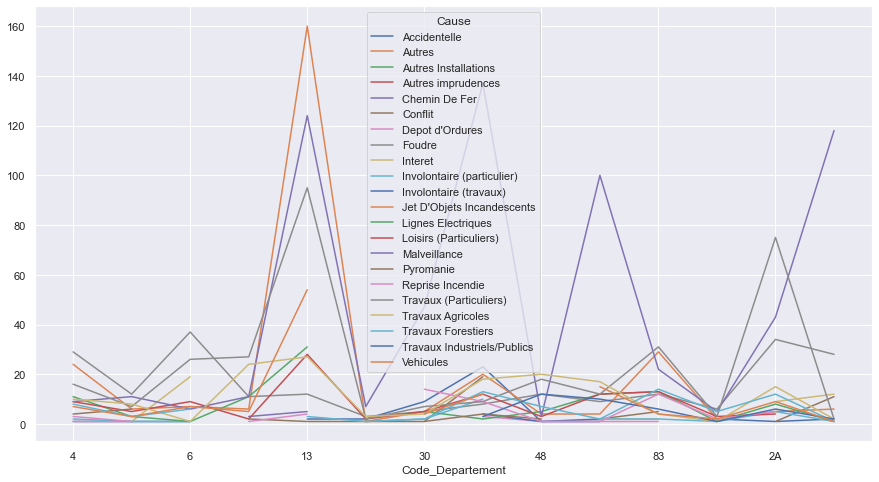

In [86]:
forest_pivot.plot()

[Text(0, 0, 'Accidentelle'),
 Text(1, 0, 'Autres'),
 Text(2, 0, 'Autres Installations'),
 Text(3, 0, 'Autres imprudences'),
 Text(4, 0, 'Chemin De Fer'),
 Text(5, 0, 'Conflit'),
 Text(6, 0, "Depot d'Ordures"),
 Text(7, 0, 'Foudre'),
 Text(8, 0, 'Interet'),
 Text(9, 0, 'Involontaire (particulier)'),
 Text(10, 0, 'Involontaire (travaux)'),
 Text(11, 0, "Jet D'Objets Incandescents"),
 Text(12, 0, 'Lignes Electriques'),
 Text(13, 0, 'Loisirs (Particuliers)'),
 Text(14, 0, 'Malveillance'),
 Text(15, 0, 'Pyromanie'),
 Text(16, 0, 'Reprise Incendie'),
 Text(17, 0, 'Travaux (Particuliers)'),
 Text(18, 0, 'Travaux Agricoles'),
 Text(19, 0, 'Travaux Forestiers'),
 Text(20, 0, 'Travaux Industriels/Publics'),
 Text(21, 0, 'Vehicules')]

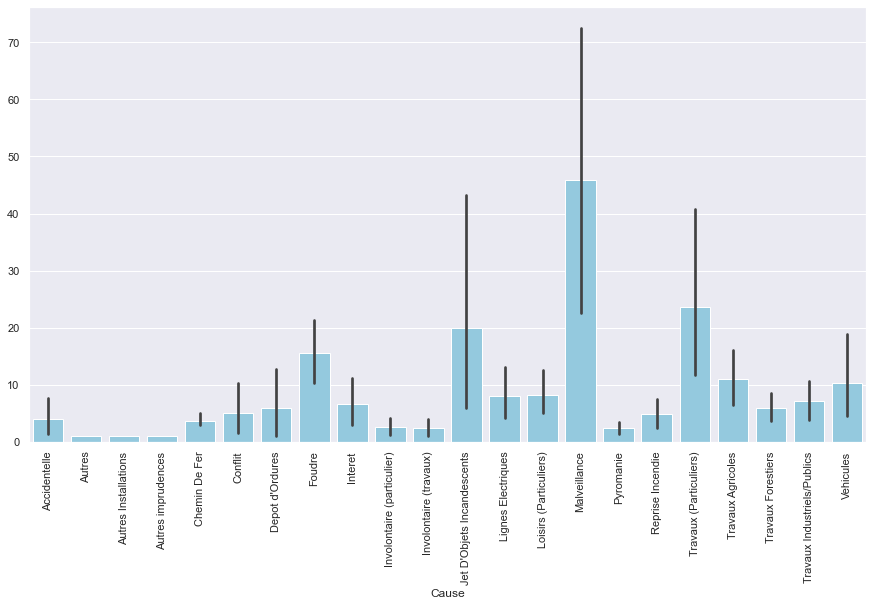

In [87]:
sns.set(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.barplot(data=forest_pivot, color="skyblue")
g.set_xticklabels(labels=forest_pivot.columns, rotation=90)

<AxesSubplot:xlabel='Code_Departement', ylabel='Area (ha)'>

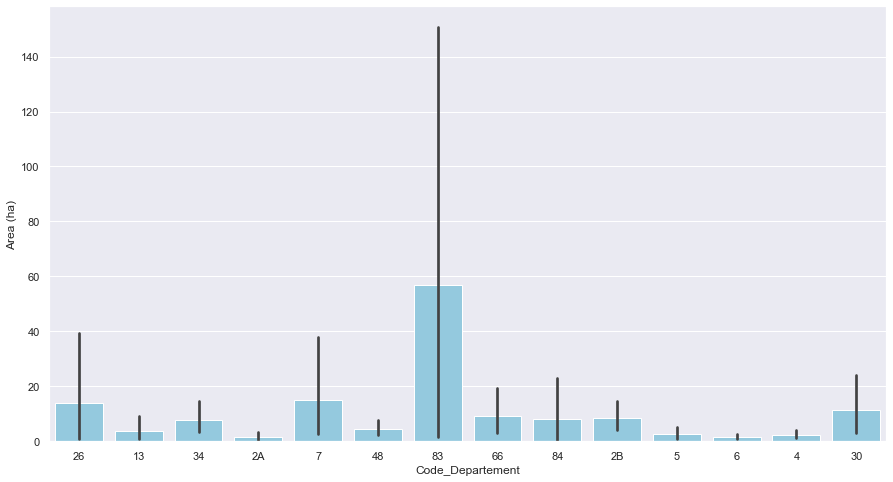

In [88]:
a = forest_cause['Code_Departement']
b = forest_cause['Area (ha)']

sns.set(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=forest_cause,x = a, y = b, color="skyblue")

In [89]:
communes_insee = pd.read_excel(r'/Users/manele/Downloads/correspondance-code-insee-code-postal1test.xlsx')



In [90]:
len(forest_cause['ID'])

2426

In [91]:
len(forest_cause['Commune'].unique())

1041

In [92]:
len(forest_cause['ID'].unique())

2157

In [93]:
ids = forest_cause["ID"]
forest_cause[ids.isin(ids[ids.duplicated()])].sort_values("ID")

,ID,Type,Date,Code_Departement,Commune,Area (ha),Cause
1077,125,Foret,2021-01-14,34,VENDRES,0.1867,Malveillance
2721,125,Foret,2022-01-21,7,CREYSSEILLES,0.6000,Lignes Electriques
1104,267,Foret,2021-01-29,34,GALARGUES,1.0775,Malveillance
2777,267,Foret,2022-01-29,7,SANILHAC,1.0000,Travaux (Particuliers)
2849,525,Foret,2022-02-08,4,FAUCON-DE-BARCELONNETTE,9.7000,Travaux (Particuliers)
...,...,...,...,...,...,...,...
2524,6245,Foret,2021-09-28,6,CONTES,0.0060,Foudre
2584,6426,Foret,2021-10-15,66,VILLELONGUE-DELS-MONTS,0.1000,Vehicules
1034,6426,Foret,2020-11-08,2A,TAVACO,7.0000,Interet
2594,6715,Foret,2021-10-19,6,EZE,0.3000,Travaux (Particuliers)


In [94]:
forest_cause.duplicated(subset=None).sum()

6

In [95]:
forest_cause.drop_duplicates(subset=None, keep='first', inplace=False,ignore_index=False)
forest_cause

,ID,Type,Date,Code_Departement,Commune,Area (ha),Cause
1,1334,Foret,2020-03-31,26,CURNIER,1.00,Accidentelle
2,5164,Foret,2020-04-02,13,FARE-LES-OLIVIERS (LA),0.10,Vehicules
4,5163,Foret,2020-04-02,13,SAINT-CANNAT,0.12,Travaux (Particuliers)
8,1335,Foret,2020-04-03,26,GRIGNAN,0.30,Malveillance
10,1336,Foret,2020-04-04,26,VINSOBRES,1.53,Travaux Agricoles
...,...,...,...,...,...,...,...
4273,5834,Foret,2022-08-30,83,BAGNOLS-EN-FORET,0.02,Foudre
4278,6219,Foret,2022-09-01,7,BEAULIEU,8.00,Foudre
4279,6115,Foret,2022-09-01,13,FUVEAU,0.05,Malveillance
4280,6220,Foret,2022-09-01,7,MONTPEZAT-SOUS-BAUZON,0.02,Reprise Incendie


In [96]:
forest_cause['ID'].duplicated()

1       False
2       False
4       False
8       False
10      False
        ...  
4273     True
4278    False
4279    False
4280    False
4281    False
Name: ID, Length: 2426, dtype: bool

In [97]:
forest_cause['ID']==4273

1       False
2       False
4       False
8       False
10      False
        ...  
4273    False
4278    False
4279    False
4280    False
4281    False
Name: ID, Length: 2426, dtype: bool

In [98]:
forest_cause.duplicated(subset=['ID']).sum()

269

In [99]:
forest_join = pd.read_csv('/Users/manele/Downloads/Forest_Fire_Join.csv')

In [100]:
forest_join

,Code_Departement,Departement,Commune,Date,Area_ha,Cause,Altitude_Moyenne,Superficie,Population,geo_point_2d
0,26,DROME,CURNIER,2020-03-31,1.0000,Accidentelle,606,1582,0.2,"44.72641161157575,5.304076177947098"
1,26,DROME,GRIGNAN,2020-04-03,0.3000,Malveillance,606,1582,0.2,"44.72641161157575,5.304076177947098"
2,26,DROME,VINSOBRES,2020-04-04,1.5300,Travaux Agricoles,606,1582,0.2,"44.72641161157575,5.304076177947098"
3,26,DROME,AUTICHAMP,2020-04-04,1.1000,Travaux Agricoles,606,1582,0.2,"44.72641161157575,5.304076177947098"
4,26,DROME,VENTEROL,2020-04-10,0.5000,Malveillance,606,1582,0.2,"44.72641161157575,5.304076177947098"
...,...,...,...,...,...,...,...,...,...,...
995,34,HERAULT,MONTBAZIN,2020-08-30,3.5009,Conflit,258,2846,1.4,"43.857251050784136,3.8764864729269832"
996,34,HERAULT,SAINT-PONS-DE-MAUCHIENS,2020-08-31,3.9616,Conflit,258,2846,1.4,"43.857251050784136,3.8764864729269832"
997,34,HERAULT,PEZENES-LES-MINES,2020-08-31,0.0914,Jet D'Objets Incandescents,258,2846,1.4,"43.857251050784136,3.8764864729269832"
998,34,HERAULT,MAGALAS,2020-09-03,5.6520,Malveillance,258,2846,1.4,"43.857251050784136,3.8764864729269832"


In [101]:
forest_join2 = pd.read_csv('/Users/manele/Downloads/Forest_Fire_Join.csv')

In [102]:
forest_join2

,Code_Departement,Departement,Commune,Date,Area_ha,Cause,Altitude_Moyenne,Superficie,Population,geo_point_2d
0,26,DROME,CURNIER,2020-03-31,1.0000,Accidentelle,606,1582,0.2,"44.72641161157575,5.304076177947098"
1,26,DROME,GRIGNAN,2020-04-03,0.3000,Malveillance,606,1582,0.2,"44.72641161157575,5.304076177947098"
2,26,DROME,VINSOBRES,2020-04-04,1.5300,Travaux Agricoles,606,1582,0.2,"44.72641161157575,5.304076177947098"
3,26,DROME,AUTICHAMP,2020-04-04,1.1000,Travaux Agricoles,606,1582,0.2,"44.72641161157575,5.304076177947098"
4,26,DROME,VENTEROL,2020-04-10,0.5000,Malveillance,606,1582,0.2,"44.72641161157575,5.304076177947098"
...,...,...,...,...,...,...,...,...,...,...
995,34,HERAULT,MONTBAZIN,2020-08-30,3.5009,Conflit,258,2846,1.4,"43.857251050784136,3.8764864729269832"
996,34,HERAULT,SAINT-PONS-DE-MAUCHIENS,2020-08-31,3.9616,Conflit,258,2846,1.4,"43.857251050784136,3.8764864729269832"
997,34,HERAULT,PEZENES-LES-MINES,2020-08-31,0.0914,Jet D'Objets Incandescents,258,2846,1.4,"43.857251050784136,3.8764864729269832"
998,34,HERAULT,MAGALAS,2020-09-03,5.6520,Malveillance,258,2846,1.4,"43.857251050784136,3.8764864729269832"


In [103]:
forest_join2['Commune'].unique()

array(['CURNIER', 'GRIGNAN', 'VINSOBRES', 'AUTICHAMP', 'VENTEROL',
       'AULAN', 'BAUME-DE-TRANSIT (LA)', 'SAINT-BARTHELEMY-DE-VALS',
       'VALENCE', 'MONTFROC', 'CHATEAUNEUF-SUR-ISERE',
       'MONTSEGUR-SUR-LAUZON', 'POYOLS', 'RECOUBEAU-JANSAC',
       'LUS-LA-CROIX-HAUTE', 'ESTABLET', 'POMMEROL', 'ECHEVIS',
       'MONTELIMAR', 'MONTGUERS', 'PUY-SAINT-MARTIN',
       'MOTTE-CHALANCON (LA)', 'VALREAS', 'PIOLENC', 'CHEVAL-BLANC',
       'MURS', 'GIGONDAS', 'SAULT', 'VITROLLES-EN-LUBERON', 'GOULT',
       'CADENET', 'FAUCON', 'FLASSAN', 'PERNES-LES-FONTAINES', 'VELLERON',
       'MONIEUX', 'SAINT-SATURNIN-LES-APT', 'SORGUES', 'RASTEAU',
       "MOTTE-D'AIGUES (LA)", 'SAINT-GELY-DU-FESC', 'LUNEL',
       'COURNONTERRAL', 'FONTES', 'AUMELAS', 'FRONTIGNAN',
       'FELINES-MINERVOIS', 'SAINT-GERVAIS-SUR-MARE', 'NIZAS',
       'NISSAN-LEZ-ENSERUNE', 'PERET', 'BEZIERS',
       'SAINT-MAURICE-NAVACELLES', 'SAINT-JEAN-DE-LA-BLAQUIERE',
       'MONTBLANC', 'VERRERIES-DE-MOUSSANS', 'MONTBAZ

In [104]:
#I realize that SQL only selected 1000 rows

In [105]:
#scatter plot number of incendies per categorie according to hectares/departments

In [106]:
communes = pd.read_excel('/Users/manele/Downloads/correspondance-code-insee-code-postal1test.xlsx')



In [107]:
forest_join = pd.read_csv('/Users/manele/Downloads/Forest_Fire_Joinn.csv')

In [108]:
forest_join['Code_Departement'].unique()

array([26, 84, 34,  4, 66, 13,  7,  6])

In [109]:
forest_cause['Code_Departement'].unique()

array([26, 13, 34, '2A', 7, 48, 83, 66, 84, '2B', 5, 6, 4, 30],
      dtype=object)

In [110]:
dep_com_join = pd.read_csv('/Users/manele/Downloads/Forest_Fire_Joinn_Dep_Com.csv')

In [111]:
dep_com_join

,Commune,Date,Area_ha,Cause,Altitude_Moyenne,Superficie,Population,geo_point_2d
0,MOTTE-CHALANCON (LA),2021-04-07,0.5200,Travaux Forestiers,606,1582,0.2,"44.72641161157575,5.304076177947098"
1,PUY-SAINT-MARTIN,2021-04-04,2.0000,Malveillance,606,1582,0.2,"44.72641161157575,5.304076177947098"
2,MONTGUERS,2020-08-26,289.3900,Accidentelle,606,1582,0.2,"44.72641161157575,5.304076177947098"
3,MONTELIMAR,2020-08-25,3.9600,Travaux Agricoles,606,1582,0.2,"44.72641161157575,5.304076177947098"
4,ECHEVIS,2020-08-22,2.4900,Malveillance,606,1582,0.2,"44.72641161157575,5.304076177947098"
...,...,...,...,...,...,...,...,...
4995,SAINT-JEAN-DE-LA-BLAQUIERE,2020-08-20,1.7369,Malveillance,7,3230,15.8,"43.563859405587785,3.902262228605502"
4996,SAINT-MAURICE-NAVACELLES,2020-08-17,1.7129,Malveillance,7,3230,15.8,"43.563859405587785,3.902262228605502"
4997,BEZIERS,2020-08-14,23.6085,Malveillance,7,3230,15.8,"43.563859405587785,3.902262228605502"
4998,FONTES,2020-08-13,0.4155,Malveillance,7,3230,15.8,"43.563859405587785,3.902262228605502"


In [112]:
dep_com_join['Commune'].unique()

array(['MOTTE-CHALANCON (LA)', 'PUY-SAINT-MARTIN', 'MONTGUERS',
       'MONTELIMAR', 'ECHEVIS', 'POMMEROL', 'ESTABLET',
       'LUS-LA-CROIX-HAUTE', 'RECOUBEAU-JANSAC', 'POYOLS',
       'MONTSEGUR-SUR-LAUZON', 'CHATEAUNEUF-SUR-ISERE', 'MONTFROC',
       'VALENCE', 'SAINT-BARTHELEMY-DE-VALS', 'BAUME-DE-TRANSIT (LA)',
       'AULAN', 'VENTEROL', 'AUTICHAMP', 'VINSOBRES', 'GRIGNAN',
       'CURNIER', "MOTTE-D'AIGUES (LA)", 'SAULT', 'RASTEAU', 'SORGUES',
       'SAINT-SATURNIN-LES-APT', 'MONIEUX', 'VELLERON',
       'PERNES-LES-FONTAINES', 'PIOLENC', 'FLASSAN', 'FAUCON', 'CADENET',
       'GOULT', 'VITROLLES-EN-LUBERON', 'GIGONDAS', 'MURS',
       'CHEVAL-BLANC', 'VALREAS', 'LIEURAN-CABRIERES', 'LESPIGNAN',
       'POILHES', 'VILLEVEYRAC', 'SIRAN', 'PUISSERGUIER', 'MONTBLANC',
       'NEBIAN', 'MONTAGNAC', 'NISSAN-LEZ-ENSERUNE',
       'SAINT-PONS-DE-MAUCHIENS', 'COURNIOU', 'BALARUC-LE-VIEUX', 'CRUZY',
       'SAINT-PRIVAT', 'FONTES', 'SAINT-JEAN-DE-LA-BLAQUIERE',
       'CABRIERES', 'LUNA

In [113]:
a = forest_cause.Commune.unique().tolist()
b = dep_com_join.Commune.unique().tolist()
matches_df = list(set(a).intersection(set(b)))

In [114]:
matches_df = list(set(a).intersection(set(b)))

In [115]:
len(matches_df)

489

In [117]:
DataFrame.merge(right, how='inner', on=None, left_on=None)

NameError: name 'DataFrame' is not defined

In [118]:
forest_cause.loc[forest_cause['Commune'] == 'BEAULIEU']

,ID,Type,Date,Code_Departement,Commune,Area (ha),Cause
4278,6219,Foret,2022-09-01,7,BEAULIEU,8.0,Foudre


In [119]:
forest_cause['Commune'].value_counts()

MARTIGUES                     55
AIX-EN-PROVENCE               34
PENNES-MIRABEAU (LES)         23
SAINT-JEAN-DE-LA-BLAQUIERE    23
LANCON-PROVENCE               18
                              ..
SAINT-ZACHARIE                 1
ISSAMOULENC                    1
BALARUC-LE-VIEUX               1
SAINT-CIRGUES-DE-PRADES        1
BEAULIEU                       1
Name: Commune, Length: 1041, dtype: int64

In [120]:
forest_cause.shape

(2426, 7)

In [121]:
the_communes = forest_cause.Commune.tolist()

In [122]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [123]:
from geopy.geocoders import Nominatim

In [124]:
requests.get('https://google.com', verify=False)

/Users/manele/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/manele/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/manele/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'consent.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>

In [126]:
forest_cause["Loc"] = forest_cause["Commune"].apply(geolocator.geocode)

NameError: name 'geolocator' is not defined

In [ ]:
pip install geocoder

In [127]:
geolocator = Nominatim(user_agent="example app")
forest_cause["Loc"] = forest_cause["Commune"].apply(geolocator.geocode)
forest_cause

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=ROVE+%28LE%29&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [128]:
forest_cause.shape

(2426, 7)

In [132]:
forest_cause['ID'].value_counts()

2649    3
5372    3
2669    3
1357    3
5067    3
       ..
2757    1
2321    1
1705    1
1701    1
5901    1
Name: ID, Length: 2157, dtype: int64

In [134]:
forest_cause['ID_new']= forest_cause.index

In [135]:
forest_cause['ID_new'].value_counts()

1       1
2842    1
2844    1
2845    1
2847    1
       ..
1390    1
1391    1
1395    1
1396    1
4281    1
Name: ID_new, Length: 2426, dtype: int64

In [137]:
forest_cause=forest_cause.drop(columns=['ID'])

In [138]:
forest_cause

,Type,Date,Code_Departement,Commune,Area (ha),Cause,ID_new
1,Foret,2020-03-31,26,CURNIER,1.00,Accidentelle,1
2,Foret,2020-04-02,13,FARE-LES-OLIVIERS (LA),0.10,Vehicules,2
4,Foret,2020-04-02,13,SAINT-CANNAT,0.12,Travaux (Particuliers),4
8,Foret,2020-04-03,26,GRIGNAN,0.30,Malveillance,8
10,Foret,2020-04-04,26,VINSOBRES,1.53,Travaux Agricoles,10
...,...,...,...,...,...,...,...
4273,Foret,2022-08-30,83,BAGNOLS-EN-FORET,0.02,Foudre,4273
4278,Foret,2022-09-01,7,BEAULIEU,8.00,Foudre,4278
4279,Foret,2022-09-01,13,FUVEAU,0.05,Malveillance,4279
4280,Foret,2022-09-01,7,MONTPEZAT-SOUS-BAUZON,0.02,Reprise Incendie,4280


In [139]:
forest_cause.to_csv(r'/Users/manele/Downloads/DF_Forest_Fire3.csv', index = False)



In [142]:
forest_cause['Code_Departement'].unique()

array([26, 13, 34, '2A', 7, 48, 83, 66, 84, '2B', 5, 6, 4, 30],
      dtype=object)

In [ ]:
#supervised learning on months and then forecasting

In [140]:
ml_forest_cause=forest_cause

In [ ]:
ml_forest_cause      drop columns, add column month
encode
y=cause
supervised ml